importing modules

In [4]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [19]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.mean(axis=3)
x_test = x_test.mean(axis=3)

x_train = x_train.reshape(-1, 32 * 32).astype('float32') / 255
x_test = x_test.reshape(-1, 32 * 32).astype('float32') / 255






Using GPU


creating and intializing the netwok model 1

In [16]:
model = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)

model.compile(
    optimizer='adam', 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)

model.summary()

history = model.fit(x_train, y_train, epochs=1000, batch_size=1000, validation_split=0.5)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 500)               512500    
                                                                 
 dense_14 (Dense)            (None, 10)                5010      
                                                                 
Total params: 517,510
Trainable params: 517,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 1s 18ms/step - loss: 2.9161 - accuracy: 0.1697 - val_loss: 2.6902 - val_accuracy: 0.2215
Epoch 2/1000
25/25 [==============================] - 0s 9ms/step - loss: 2.5939 - accuracy: 0.2524 - val_loss: 2.5441 - val_accuracy: 0.2625
Epoch 3/1000
25/25 [==============================] - 0s 10ms/step - loss: 2.4743 - accuracy: 0.2782 - val_loss: 2.4360 - val_accuracy: 0.2874
Epoch 4/1000
25/

evaluating model 1

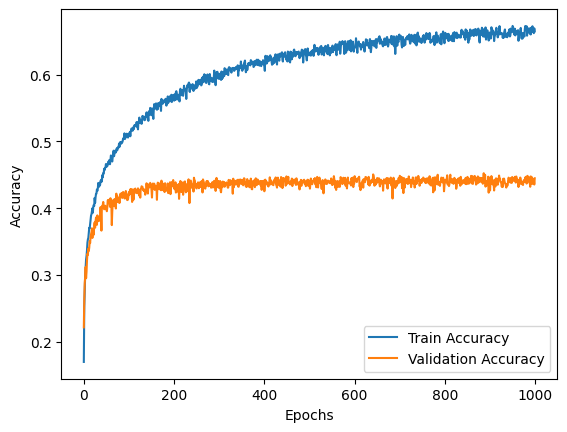

313/313 [==============================] - 1s 4ms/step - loss: 1.9753 - accuracy: 0.4456
Test Loss: 1.9752781391143799
Test Accuracy: 0.4456000030040741


In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')